<img src='brasao.png' height='50px' width='50px'/>
<p style='text-align:center;'> Universidade Federal do Ceará</p>
<p style='text-align:center;'> Campus Sobral</p>
<p style='text-align:center;'> Engenharia da Computação e Engenharia Elétrica</p>
<p style='text-align:center;'>Tópicos Especiais em Telecomunicações I (ECO0080)</p>
<p style='text-align:center;'>(Reconhecimento de Padrões)</p>
<p style='text-align:center;font-weight:bolder'>PCA e Classificador SVM</p>

- Aluno: Samuel Hericles Souza Silveira
- Data: 05/10/2020


#### 0) Informações Gerais
- Trabalho Individual. Simulação (código) e resposta às perguntas teóricas.
- O código deve estar bem organizado e comentado, para que possa estar inteligível.
- Não usar “funções prontas” para: SVM e PCA.
- Pode usar “funções prontas” para cálculo de: Determinante, Inversa, Autovetores e
Autovalores, bem como funções utilizadas para calcular a solução do problema de
programação quadrática (Ex: quadprog, fmincom).

#### 1) Base de dados: Base de classificação a sua escolha (com atributos já calculados).
- Pode ser retirado de sites, tais como:

        https://archive.ics.uci.edu/ml/datasets

        https://www.kaggle.com/datasets

- Restrição: A base de dados deve ter um número elevado de atributos (>= 30), de modo que o PCA possa ser útil.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funcoes_importantes as fi
from qpsolvers import solve_qp
fp = fi.funcoes_main()
base = fi.carrega_base()
urban_df = base.urban_df
urban_df = fp.normaliza_max_min(urban_df)
urban_df = fp.ordena_por_classe(urban_df)
urban_df

,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,...,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140,c35
0,0.257790,0.003127,0.448864,0.667747,0.222065,0.215103,0.591971,0.675063,0.688388,0.618265,...,0.560743,0.004710,0.883117,0.544444,0.811856,0.660550,0.649485,0.657534,0.079892,1
1,0.056657,0.005906,0.224432,0.830746,0.019802,0.073227,0.707304,0.859087,0.866035,0.970167,...,0.864031,0.017111,0.870130,0.577778,0.716495,0.564220,0.804124,0.383562,0.075152,1
2,0.000000,0.006080,0.017045,0.922701,0.000000,0.000000,0.785491,0.950548,0.965801,0.381735,...,0.394105,0.006122,0.870130,0.322222,0.703608,0.500000,0.639175,0.383562,0.098172,1
3,0.000000,0.013549,0.062500,0.948133,0.015559,0.018307,0.830603,0.968603,0.977216,0.266362,...,0.864031,0.017111,0.870130,0.577778,0.716495,0.564220,0.804124,0.383562,0.075152,1
4,0.000000,0.003821,0.005682,0.764131,0.000000,0.004577,0.735499,0.913514,0.585565,0.477321,...,0.607770,0.079906,0.792208,0.666667,0.793814,0.362385,0.969072,0.328767,0.097721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.223796,0.006601,0.323864,0.552689,0.152758,0.173913,0.292696,0.549430,0.777323,0.604871,...,0.752598,0.006907,0.935065,0.766667,0.631443,0.816514,0.443299,0.369863,0.023471,9
671,0.206799,0.024666,0.511364,0.753493,0.206506,0.178490,0.371062,0.839007,0.996090,0.174429,...,0.476742,0.000785,0.948052,0.700000,0.564433,0.775229,0.288660,0.342466,0.021891,9
672,0.025496,0.018412,0.062500,0.835084,0.048091,0.027460,0.463167,0.990268,0.990248,0.547032,...,0.895553,0.010675,0.935065,0.522222,0.695876,0.669725,0.453608,0.424658,0.038140,9
673,0.167139,0.018760,0.286932,0.777418,0.099010,0.130435,0.386770,0.889867,0.999101,0.204871,...,0.251150,0.003140,0.909091,0.777778,0.525773,0.885321,0.350515,0.342466,0.048522,9


### 2) Questões:

### 2.1) Apresentação da base de dados.
    - Definir o problema abordado pela base de dados.
    - Evidenciar de quantas amostras, atributos e classes o problema é composto
### Urban Land Cover Data Set
    Resumo: 
        Classificação da cobertura do solo urbano usando imagens aéreas de alta resolução. Destina-se a auxiliar os esforços de planejamento urbano sustentável.
        
    Número de classes: 9
    Número de atributos: 147(contando com a coluna de classes)
    Número de amostras: 675

    Fonte:

        Brian Johnson;

        Instituto de Estratégias Ambientais Globais;

        2108-11 Kamiyamaguchi, Hayama, Kanagawa, 240-0115 Japão;

        Email: Johnson@iges.or.jp


    Informações do conjunto de dados:

        Contém dados de treinamento e teste para classificar uma imagem aérea de alta resolução em 9 tipos de cobertura do solo urbano. As informações de espectro, tamanho, forma e textura em várias escalas são usadas para classificação. Há um baixo número de amostras de treinamento para cada classe (14-30) e um alto número de variáveis ​​de classificação (148), portanto, pode ser um conjunto de dados interessante para testar métodos de seleção de recursos. O conjunto de dados de teste é de uma amostra aleatória da imagem.

        Classe é a variável de classificação de destino. As classes de cobertura do solo são: árvores, grama, solo, concreto, asfalto, edifícios, carros, piscinas, sombras.


    Informações sobre o atributo:

        Dicionário:
        + Classe: Classe de cobertura do solo (nominal)
        + BrdIndx: Índice de borda (variável de forma)
        + Área: Área em m2 (variável de tamanho)
        + Redondo: Redondeza (variável de forma)
        + Brilho: Brilho (variável espectral)
        + Compacto: Compacidade (variável de forma)
        + ShpIndx: índice da forma (variável da forma)
        + Média_G: Verde (variável espectral)
        + Mean_R: Red (variável espectral)
        + Mean_NIR: infravermelho próximo (variável espectral)
        + SD_G: Desvio padrão de verde (variável de textura)
        + SD_R: desvio padrão do vermelho (variável de textura)
        + SD_NIR: Desvio padrão do infravermelho próximo (variável de textura)
        + LW: Comprimento / Largura (variável de forma)
        + GLCM1: Matriz de Co-ocorrência de Nível de Cinza [esqueci qual tipo de métrica GLCM é essa] (variável de textura)
        + Retangular: Retangularidade (variável de forma)
        + GLCM2: Outro atributo da Matriz de Coocorrência de Nível de Cinza (variável de textura)
        + Dens: Densidade (variável de forma)
        + Assym: assimetria (variável de forma)
        + NDVI: Índice de Vegetação por Diferença Normalizada (variável espectral)
        + BordLngth: Comprimento da borda (variável de forma)
        + GLCM3: Outro atributo da Matriz de Coocorrência de Nível de Cinza (variável de textura)

 Nota: Essas variáveis ​​se repetem para cada escala mais grosseira (ou seja, variável_40, variável_60, ... variável_140).

### 2.2) PCA
    I) Subtrair a média de cada atributo da base de dados.
    II) Aplicar a técnica PCA e indicar, pela “variância explicada”, a quantidade de atributos que
    vão ser utilizados na base de dados transformada.;
    III) Transformar a base de dados a partir da matriz de transformação gerada pela técnica PCA

In [2]:
def PCA(base,limiar=0.999999):
    
    # Divido Treino e teste
    X,y = fp.treino_teste_70_30(base)
    
    # 1 - Removendo a média do treino e teste
    base_dados_media_zero_X = X[X.columns[:-1]] - fp.vetor_medio(X).values
    base_dados_media_zero_X['c35'] = X['c35']

    base_dados_media_zero_y = y[y.columns[:-1]] - fp.vetor_medio(y).values
    base_dados_media_zero_y['c35'] = y['c35']
    
    # 2 - EVD
    Ri = fp.matriz_covariancia(base_dados_media_zero_X)
    AutoValores,AutoVetores = np.linalg.eig(np.matrix(Ri.values, dtype='float'))
    df_AutoValores = pd.DataFrame(AutoValores)
    df_AutoVetores = pd.DataFrame(AutoVetores)

    # 3 - Escolhendo o número de componentes a partir do limiar rth
    energ = df_AutoValores.cumsum()
    rth = limiar
    inde = np.argwhere(energ.values < energ.iloc[-1].values[0]*rth)[:,0] # find()
    Q2 = pd.DataFrame([df_AutoVetores.iloc[i].values for i in inde]) # W

    # 4 - Transformando os dados
    df_aux_x = base_dados_media_zero_X.iloc[:,:-1]
    df_aux_y = base_dados_media_zero_y.iloc[:,:-1]
    
    PCA_sem_perda_x = (df_AutoVetores.values@df_aux_x.T).T
    
    X_pca = (Q2.values@df_aux_x.T).T
    Y_pca = (Q2.values@df_aux_y.T).T

    print(f'Redução de {100*round(1 - X_pca.shape[1]/df_aux_x.shape[1],2)}% na dimensão')

    # 5 - (Reversão da base) Transformando de volta a matriz
    Base_old_sem_perda = PCA_sem_perda_x@df_AutoVetores + fp.vetor_medio(X).values
    Base_old_com_perda = X_pca@Q2 + fp.vetor_medio(X).values
    colunas = { i:j for i,j in zip(range(X.columns[:-1].shape[0]),X.columns[:-1])}
    Base_old_sem_perda.rename(columns=colunas,inplace=True)
    Base_old_com_perda.rename(columns=colunas,inplace=True)

    # 6 - Verificar quanto de info foi perdida
    perda = np.mean(np.mean(pow(abs(Base_old_com_perda 
                                    - X.iloc[:,:-1]),2)))/np.mean(np.mean(pow(abs(X.iloc[:,:-1]),2)))
    print(f'Perda de: {perda}')
    
    X_pca['c35'] = X['c35']
    Y_pca['c35'] = y['c35']

    X_pca = fp.ordena_por_classe(X_pca)
    Y_pca = fp.ordena_por_classe(Y_pca)
    
    return X_pca,Y_pca

### SVM
    I) Informações gerais
    - Implementar o SVM em sua forma dual, não-linear e relaxada.
    - Sua rotina deve testar diferentes valores da constante de relaxamento “C”.
    - Os seguintes kernels devem ser utilizados: Linear e RBF.
    - Para o kernel RBF, testar diferentes valores para o parâmetro “gamma”.
    - No caso de uma base de dados com mais de duas classes, utilizar a abordagem 1 vs all.(check)

    II) Com a base de dados transformada:
    - Dividir os dados entre treinamento (70%) e teste (30%)
    - Para cada valor dos hiperparâmetros “gamma” (no caso do kernel RBF) e “C”, realizar o seguinte procedimento:
        - A partir dos dados de treinamento, gere o modelo do(s) classificador(es) SVM.
        - Classifique os dados de teste (a partir do modelo gerado), e guarde a acurácia.
        - A partir do modelo que gerou a melhor acurácia:
        - Indique os hiperparâmetros que levaram a esse resultado.
        - Gere a matriz de confusão obtida através dos resultados com os dados de teste.

### SVM Linear: Exemplo

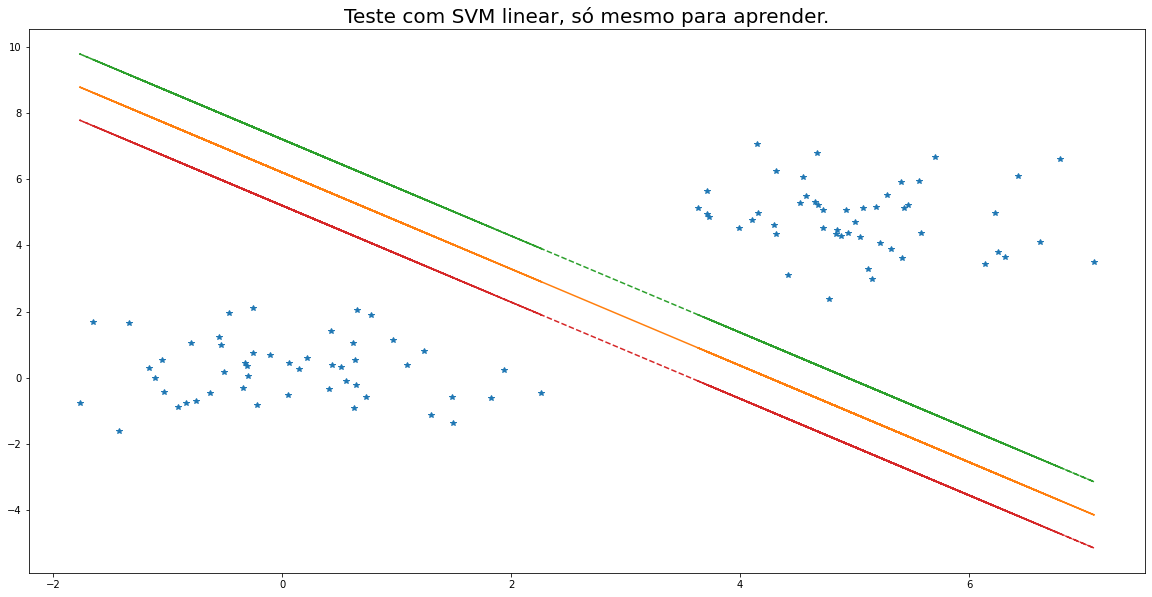

In [3]:
a = [np.random.normal(0,1) for _ in range(50)]
for i in range(50):
    a.append(np.random.normal(5,1))

a2 = [np.random.normal(0,1) for _ in range(50)]
for i in range(50):
    a2.append(np.random.normal(5,1))
amostra_aux = [a,a2]

# 1 - Carregar a base de dados com duas classes
amostra = pd.DataFrame([a,a2]).T

# 2 - Carregar vetor y dos rótulos -1 e +1
y = pd.concat([pd.DataFrame(np.ones([50,1])),pd.DataFrame(-np.ones([50,1]))])
y.reset_index(drop=True,inplace=True)       #100x1

# 3 - Programação quadrática para obter alpha
diag_y = np.identity(y.shape[0],dtype='int')*y.values
B = diag_y @ amostra.values @ amostra.T.values @ diag_y
B += np.identity(y.shape[0],dtype='int')*0.01
b = -np.ones((100))                        
A = np.identity(b.shape[0],dtype='int')*-1    

c = np.zeros((100))                        
Aeq = y.values    
Aeq = Aeq.reshape((100))
beq = np.array([1.])                          

alpha = solve_qp(B, b, A, c, Aeq, beq)

diag_alpha = np.identity(alpha.shape[0],dtype='int')*alpha

# 5 - Calcular o vetor de pesos
w = amostra.T@diag_y@diag_alpha
w = w.sum(axis=1)

# 6 - Encontrar o melhor vetor de suporte
vetores_sup = np.argwhere(alpha>1e-8)
b= 0
for i in vetores_sup:
    b = b + 1/y.iloc[i[0]].values - w.T.values@amostra.iloc[i[0],:].values
b = b/vetores_sup.shape[0]

# 7 - Testar os dados
y_pred = np.sign(w@amostra.T+b[0])

w_div = w[0]/w[1]

vsup_sum_b   = -(w_div * amostra.iloc[:,0].values + b/w[1]) # amostra.iloc[:,1]

plt.figure(figsize=(20,10))
plt.plot(amostra.iloc[:,0],amostra.iloc[:,1],'*')
plt.title('Teste com SVM linear, só mesmo para aprender.',fontsize=20)
plt.plot(amostra.iloc[:,0],vsup_sum_b)
plt.plot(amostra.iloc[:,0],vsup_sum_b+1,'--')
plt.plot(amostra.iloc[:,0],vsup_sum_b-1,'--')

plt.show()

Usei dados aleatórios gaussianos, variando a média e mantendo a variância.

### Kernel Linear

$K(\overrightarrow{x_i},\overrightarrow{x_j})$= $(\overrightarrow{x}_{t}^T \overrightarrow{x}_j + 1)^d$

$ X_{[p x N_{tr}]}$ :. $\overrightarrow{X}_{{tr}_{[px1]}}$ :. $K_{[N_{tr} x N_{tr}]}$
:. $k_{ij} -> (cte) = k(\overrightarrow{x}_i,\overrightarrow{x}_j)$



$$
K_{[N_{tr} x N_{tr}]} = 
\begin{vmatrix}
k_{1,1}&k_{1,2}& ...& k_{1,N_{tr}}\\
....&....& ...& ....\\
k_{1,N_{tr}}&....&...& k_{N_{tr}, N_{tr}}\\
\end{vmatrix}
$$    


In [4]:
def Kernel_Linear(X,d):
    kernel = pd.DataFrame(index=[i for i in range(X.shape[0])],
                      columns=[i for i in range(X.shape[0])])
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            kernel.iloc[i,j] = (X.iloc[i,:-1].T@X.iloc[j,:-1]+1)**d
    return kernel

### Kernel RBF

- Kernel $K(\overrightarrow{x_i},\overrightarrow{x_j})$= $exp(-\gamma||\overrightarrow{x}_i - \overrightarrow{x}_j||^2 )$

    $X_{[p x N_{tr}]}$ :. $\overrightarrow{X}_{{tr}_{[px1]}}$ :. $K_{[N_{tr} x N_{tr}]}$
    :. $k_{ij} -> (cte) = k(\overrightarrow{x}_i,\overrightarrow{x}_j)$
$$
K_{[N_{tr} x N_{tr}]} = 
\begin{vmatrix}
k_{1,1}&k_{1,2}& ...& k_{1,N_{tr}}\\
....&....& ...& ....\\
k_{1,N_{tr}}&....&...& k_{N_{tr}, N_{tr}}\\
\end{vmatrix}
$$    


In [5]:
def Kernel_RBF(X,gamma):
    kernel = pd.DataFrame(index=[i for i in range(X.shape[0])],
                          columns=[i for i in range(X.shape[0])]) 
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            kernel.iloc[i,j] = np.exp(-gamma*(np.linalg.norm(X.iloc[i,:-1].T-X.iloc[j,:-1])**2))            
    return kernel

### Carregar a base dados

   - Minha base de dados está muito desbalanceada a ponto que em certos valores para d no kernel linear, a programação quadrática não retorna valor, apenas um erro de incoerência, pois os valores de entrada( a variavel B) chega na casa de $10^{118}$. Portanto fiz a normalização max-min para que todos os valores ficassem entre {0,1}.
   - Dividi a base de treino e teste pegando amostras aleatórias entre elas. Pegei 30% das amostras aleatóriamente e coloquei como base de teste, assim, o que sobrou ficou como base de treino..

In [6]:
X_pca,y_pca = PCA(urban_df,limiar=0.9)
X_pca.head()

Redução de 91.0% na dimensão
Perda de: 0.13876429191561288


,0,1,2,3,4,5,6,7,8,9,10,11,12,c35
0,-0.093532,-0.142565,0.018806,0.171415,-0.223841,-0.114134,0.163841,0.013656,-0.423482,-0.465216,-0.247645,-0.152157,0.155879,1
1,-0.382716,-0.245910,0.064350,0.212468,-0.238542,-0.362472,0.345619,-0.143838,-0.269554,-0.160604,-0.232334,0.234978,-0.118198,1
2,-0.102771,0.020905,-0.190043,0.175935,0.037126,-0.259763,-0.060917,-0.140032,-0.021268,-0.194917,0.182394,-0.085558,0.136889,1
3,-0.395528,-0.056864,-0.243530,-0.052961,0.049683,-0.076605,-0.037282,-0.188048,-0.049542,-0.089606,0.046208,0.157714,0.027293,1
4,-0.596873,-0.204378,-0.251812,0.142469,-0.103775,-0.200285,0.165390,-0.267329,0.017339,0.277211,0.101884,0.325810,0.036999,1


    Base dados por classe e normalizei com max-min, além de tudo, reduzi com o PCA no que resulto em 91% na redução dos dados e perda apenas de 13% de informação.

### SVM Relaxado: Implementação
    SVM dual relaxado e o não linear depende do kernel.

In [7]:
def SVM_Relaxado(Treino,teste,C,K_treino,K_teste,classe):

    # 1 - Carregar a base de dados com duas classes, retirar a coluna de classe.
    X_class_less = Treino.iloc[:,:-1]
    y_class_less = teste.iloc[:,:-1]
    
    # 2 - Carregar vetor y dos rótulos +1 e -1    
    y_classe_1_menos_1_treino = fp.classe_1_menos_1(Treino,classe) # trenio:nº amostra x 1  shape: (n º amostra,1)
    y_classe_1_menos_1_teste  = fp.classe_1_menos_1(teste,classe)  # teste :nº amostra x 1  shape: (n º amostra,1)
    
    # 3 - Programação quadrática para obter alpha
    diag_y = np.identity(y_classe_1_menos_1_treino.shape[0],dtype='int')*y_classe_1_menos_1_treino.values

    B = (diag_y @ K_treino) @ diag_y
    B = ((B + B.T)/2).values
    B += np.identity(B.shape[0],dtype='int')*0.1       # B:   nº amostra x n º amostra  shape: (n º amostra,n º amostra)
    B = B.astype('double')

    b = -C*np.ones((Treino.shape[0]))                  # b:   n º amostra x 1           shape: (n º amostra,)
    A = -np.identity(b.shape[0],dtype='float')         # A:   n º amostra x n º amostra shape: (n º amostra,n º amostra) 
    A = A.astype('double')
    c = np.zeros((Treino.shape[0]))                    # c:   n º amostra x 1           shape: (n º amostra, 1)  
    
    Aeq = y_classe_1_menos_1_treino.T.values           # Aeq: 1 x n º amostra           shape: (n º amostra,)
    beq = np.array([0])                                # beq: 1x1                       shape: (1,)  

    alpha = solve_qp(B, b, A, c, Aeq, beq)             # alpha: n º amostra x 1         shape: (n º amostra,) 
    
    # 4 - Encontrar os vetores de suporte 
    vetores_sup = np.argwhere(alpha>1e-4)              # vetores_sup: amos reduzido x 1 shape:(n º amostra reduzido,1)
    
    # 5 - Encontrar o bias
    bias = 0
    for i in vetores_sup[:,0]:
        bias = bias + 1/y_classe_1_menos_1_treino.iloc[i].values[0]
        for ii in vetores_sup[:,0]:
            bias = bias - y_classe_1_menos_1_treino.iloc[ii].values[0]*alpha[ii]*K_treino.iloc[ii,i]
    bias = bias/vetores_sup.shape[0]                  # bias: 1x1                       shape:(1,)

    # 6 - Acurácia dos dados de teste
    w_t_k_teste = 0
    for ii in vetores_sup[:,0]:
        if ii<K_teste.shape[0]:
            w_t_k_teste = w_t_k_teste + y_classe_1_menos_1_teste.iloc[ii].values[0]*alpha[ii]*K_teste.iloc[ii,:].values
    
    y_pred_teste = np.sign(w_t_k_teste + b[0])
    return y_classe_1_menos_1_teste.values[:,0],y_pred_teste

## Etapa de testes
        Estou variando o C(slack) em ambos os testes e, quando é o kernel rbf testo com 6 valores diferentes de gamma. Além disso, como o problema é muite-classe( há 9 classes) então fiz a abordagem 1 vs all que é cada classe contra todas as outras.

### Teste com SVM Não linear relaxado com Kernel Linear

In [8]:
K_treino = Kernel_Linear(X_pca.iloc[:,:-1],14)
K_teste  = Kernel_Linear(y_pca.iloc[:,:-1],14)
df_acc = pd.DataFrame(index=['classe 1','classe 2','classe 3',
                             'classe 4','classe 5','classe 6',
                             'classe 7','classe 8','classe 9'],
                      columns=[0.001,0.01,0.1,1,10,10])
for classe,i in zip([1,2,3,4,5,6,7,8,9],range(9)):
    for C,j in zip([0.001,0.01,0.1,1,10,10],range(6)):
        y_true,y_pred = SVM_Relaxado(X_pca,y_pca,C,K_treino,K_teste,classe)
        df_acc.iloc[i,j] = 100*fp.acc(y_true,y_pred)
display(df_acc)

,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,91,85,85,85,85,85
classe 2,77,77,77,77,77,77
classe 3,88,88,88,88,88,88
classe 4,86,86,86,86,86,86
classe 5,93,93,93,93,93,93
classe 6,81,81,81,81,81,81
classe 7,89,92,92,92,92,92
classe 8,96,95,95,95,95,95
classe 9,97,98,98,98,98,98


Matriz de confusão da classe 1 vs all
precisao    0.790750
recall      0.625452
acurácia    0.839806
f1-score    0.653782
dtype: float64


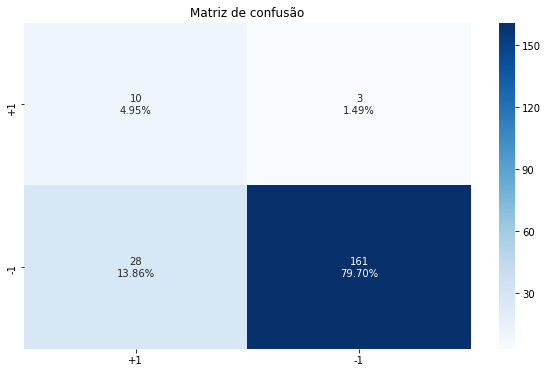

Matriz de confusão da classe 2 vs all
precisao    0.570426
recall      0.614927
acurácia    0.766990
f1-score    0.577291
dtype: float64


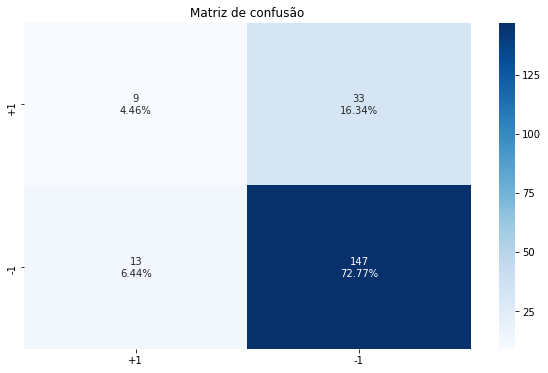

Matriz de confusão da classe 3 vs all
precisao    0.516453
recall      0.688725
acurácia    0.873786
f1-score    0.501860
dtype: float64


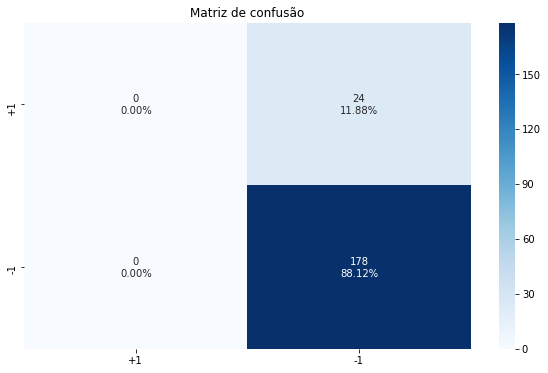

Matriz de confusão da classe 4 vs all
precisao    0.513272
recall      0.676471
acurácia    0.849515
f1-score    0.489406
dtype: float64


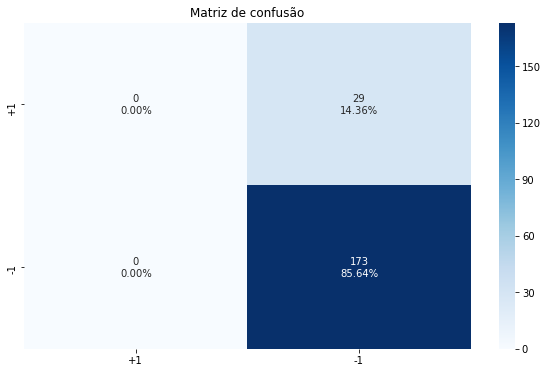

Matriz de confusão da classe 5 vs all
precisao    0.526766
recall      0.710784
acurácia    0.917476
f1-score    0.531003
dtype: float64


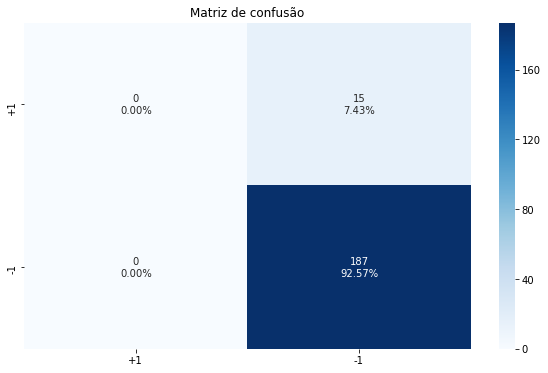

Matriz de confusão da classe 6 vs all
precisao    0.518330
recall      0.653465
acurácia    0.800971
f1-score    0.488586
dtype: float64


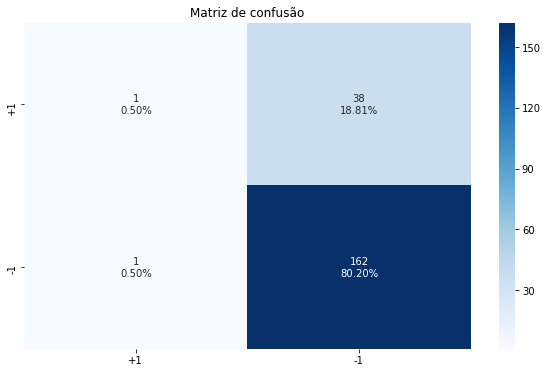

Matriz de confusão da classe 7 vs all
precisao    0.637238
recall      0.892045
acurácia    0.907767
f1-score    0.687055
dtype: float64


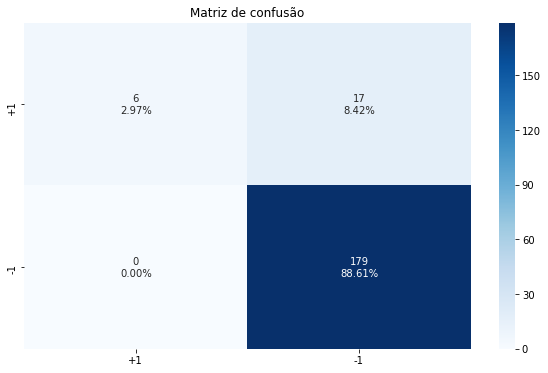

Matriz de confusão da classe 8 vs all
precisao    0.851804
recall      0.742021
acurácia    0.941748
f1-score    0.784293
dtype: float64


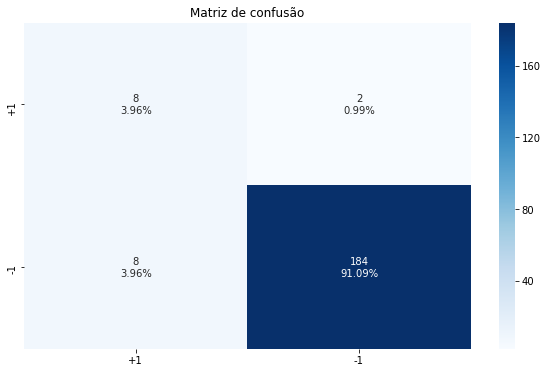

Matriz de confusão da classe 9 vs all
precisao    0.664129
recall      0.860149
acurácia    0.966019
f1-score    0.721997
dtype: float64


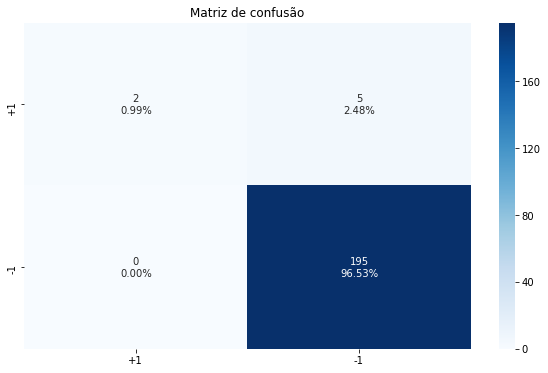

In [9]:
K_treino = Kernel_Linear(X_pca.iloc[:,:-1],14)
K_teste  = Kernel_Linear(y_pca.iloc[:,:-1],14)

for classe in range(9):
    y_true,y_pred = SVM_Relaxado(X_pca,y_pca,0.1,K_treino,K_teste,classe+1)
    df_matriz_de_confusao = fp.matriz_confusao_binario(y_true,y_pred)
    print(f'Matriz de confusão da classe {classe+1} vs all')
    print(fp.parametros_de_medicao(df_matriz_de_confusao+1)) # Somo +1 para não dar divisão por zero
    fp.plot_matiz_de_confusao_binaria(df_matriz_de_confusao)

### Teste com SVM Não linear relaxado com Kernel RBF

In [11]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    K_treino_r = Kernel_RBF(X_pca.iloc[:,:-1],gamma)
    K_teste_r  = Kernel_RBF(y_pca.iloc[:,:-1],gamma) 
    df_acc = pd.DataFrame(index=['classe 1','classe 2','classe 3',
                                 'classe 4','classe 5','classe 6',
                                 'classe 7','classe 8','classe 9'],
                          columns=[0.001,0.01,0.1,1,10,10])
    for classe,i in zip([1,2,3,4,5,6,7,8,9],range(9)):
        for C,j in zip([0.001,0.01,0.1,1,10,10],range(6)):
            y_true,y_pred = SVM_Relaxado(X_pca,y_pca,C,K_treino_r,K_teste_r,classe)
            df_acc.iloc[i,j] = 100*fp.acc(y_true,y_pred)
    print(f'gamma={gamma}')
    display(df_acc)

gamma=0.001


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,92,92,92,92,92,92
classe 2,85,85,85,85,85,85
classe 3,86,86,86,86,86,86
classe 4,82,82,82,82,82,82
classe 5,93,93,93,93,93,93
classe 6,81,81,81,81,81,81
classe 7,90,90,90,90,90,90
classe 8,94,94,94,94,94,94
classe 9,97,97,97,97,97,97


gamma=0.01


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,92,92,92,92,92,92
classe 2,85,85,85,85,85,85
classe 3,86,86,86,86,86,86
classe 4,82,82,82,82,82,82
classe 5,93,93,93,93,93,93
classe 6,81,81,81,81,81,81
classe 7,90,90,90,90,90,90
classe 8,94,94,94,94,94,94
classe 9,97,97,97,97,97,97


gamma=0.1


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,92,92,92,92,92,92
classe 2,85,85,85,85,85,85
classe 3,86,86,86,86,86,86
classe 4,82,82,82,82,82,82
classe 5,93,93,93,93,93,93
classe 6,81,81,81,81,81,81
classe 7,90,90,90,90,90,90
classe 8,94,94,94,94,94,94
classe 9,97,97,97,97,97,97


gamma=1


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,93,93,93,93,93,93
classe 2,85,85,85,85,85,85
classe 3,86,86,86,86,86,86
classe 4,82,82,82,82,82,82
classe 5,93,93,93,93,93,93
classe 6,81,81,81,81,81,81
classe 7,90,90,90,90,90,90
classe 8,94,94,94,94,94,94
classe 9,97,97,97,97,97,97


gamma=10


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,100,100,100,100,100,100
classe 2,93,93,93,93,93,93
classe 3,93,93,93,93,93,93
classe 4,93,93,93,93,93,93
classe 5,98,98,98,98,98,98
classe 6,93,93,93,93,93,93
classe 7,96,96,96,96,96,96
classe 8,99,99,99,99,99,99
classe 9,99,99,99,99,99,99


gamma=100


,0.001,0.010,0.100,1.000,10.000,10.000
classe 1,100,100,100,100,100,100
classe 2,100,100,100,100,100,100
classe 3,100,100,100,100,100,100
classe 4,100,100,100,100,100,100
classe 5,100,100,100,100,100,100
classe 6,100,100,100,100,100,100
classe 7,100,100,100,100,100,100
classe 8,100,100,100,100,100,100
classe 9,99,99,99,99,99,99


**18 horas para produzir essas tabelas....**

       Contudo, podemos percerber que com gamma = 100 os resultados de teste foram melhores. O que achei estranho foi que os valores de C variaram pouco, mas isso se dá ao fato que o meu np.argwhere(o find no MATLAB) procura valores menores que $10^{-4}$, por que depois disso não irá fazer muita diferenaça na projeção dos hiperplanos separadores. Só que quando retorno vejo a saída do meu alpha, os menores valores estão na casa de $10^{-15}$. Sendo assim, o C nesta base de dados não fez muita diferença seu aumentar ele cada vez mais. O que poderia ser feito era atributir valores de C muito baixos para ver alguma diferença.

### Exibindo o pior e o melhor resultado para o kernel rbf

       Abaixo veja a matriz de confusão, bem como outras métricas importantes para avaliar o resultado do modelo. Este primeiro modelo  que usa C=0.01 e gamma = 0.01 foi um dos priores resultados. O segundo modelo foi já com gamma=100 que obteve melhores resultados. O interessante em ver neles é que a acurácia em ambos é alta, porém vemos a discrepância nas outras outras métricas como precisão, recall e f1-score. Além disso, é mais gritante qunado visto na matriz de confusão, em que o pior modelo classifica todas as amostras como -1 e o melhor modelo classifica corretamente as amostras

precisao    0.515048
recall      0.683824
acurácia    0.864078
f1-score    0.496684
dtype: float64


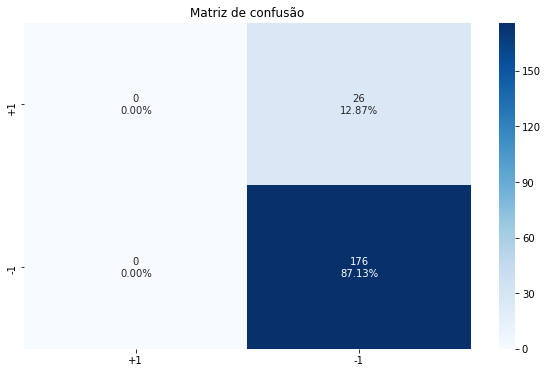

In [9]:
K_treino_r = Kernel_RBF(X_pca.iloc[:,:-1],0.01)
K_teste_r  = Kernel_RBF(y_pca.iloc[:,:-1],0.01) 
y_true,y_pred = SVM_Relaxado(X_pca,y_pca,0.01,K_treino_r,K_teste_r,3)
df_matriz_de_confusao = fp.matriz_confusao_binario(y_true,y_pred)
print(fp.parametros_de_medicao(df_matriz_de_confusao+1)) # Somo +1 para não dar divisão por zero
fp.plot_matiz_de_confusao_binaria(df_matriz_de_confusao)

precisao    1.0
recall      1.0
acurácia    1.0
f1-score    1.0
dtype: float64


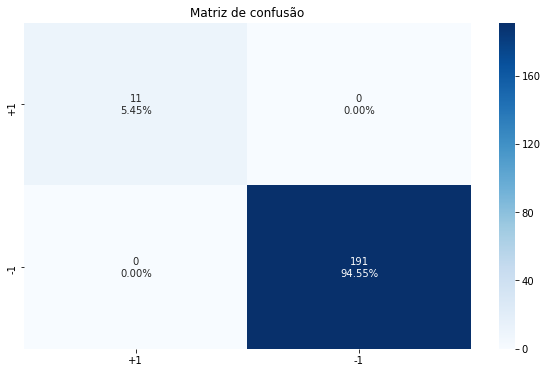

In [8]:
K_treino_r = Kernel_RBF(X_pca.iloc[:,:-1],100)
K_teste_r  = Kernel_RBF(y_pca.iloc[:,:-1],100) 
y_true,y_pred = SVM_Relaxado(X_pca,y_pca,0.001,K_treino_r,K_teste_r,1)
df_matriz_de_confusao = fp.matriz_confusao_binario(y_true,y_pred)
print(fp.parametros_de_medicao(df_matriz_de_confusao)) # Somo +1 para não dar divisão por zero
fp.plot_matiz_de_confusao_binaria(df_matriz_de_confusao)